## Imports

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf

## Data

### Spacy Embeddings

In [ ]:
X = ekg_denoised['spacy_embeddings']
y = ekg_denoised['ICD9_CODE']

In [2]:
ekg_denoised = pd.read_pickle('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_spacy.pkl')
ekg_denoised = ekg_denoised.sample(frac=1)


In [3]:
ekg_denoised.head()

,ICD9_CODE,spacy_embeddings
4367,2,"[-0.04045854, 0.2300158, -0.17636456, -0.04894..."
1992,1,"[0.003988932, 0.19777873, -0.13590734, -0.0158..."
2914,1,"[-0.060594335, 0.24765909, -0.08178727, -0.046..."
3199,1,"[-0.13439086, 0.25095052, -0.07766353, -0.0083..."
2714,1,"[0.07055457, 0.26197386, -0.15005292, 0.006193..."


In [4]:
ekg_denoised['spacy_embeddings'][4603].shape

(300,)

### Train/Dev/Test/Split

In [6]:
train_X, validate_X, test_X = np.split(X.sample(frac=1), 
                                       [int(.6*len(X)), 
                                        int(.8*len(X))])

train_y, validate_y, test_y = np.split(y.sample(frac=1), 
                                       [int(.6*len(y)), 
                                        int(.8*len(y))])

In [7]:
train_X = np.array(train_X)
train_y = np.array(train_y)

In [8]:
new_train_X = []
for i in train_X:
    new_train_X.append(list(i))
train_X = np.array(new_train_X)
    
new_validate_X = []
for i in validate_X:
    new_validate_X.append(list(i))
validate_X = np.array(new_validate_X)
    
new_test_X = []
for i in test_X:
    new_test_X.append(list(i))
test_X = np.array(new_test_X)

## Model

In [9]:
inputs = tf.keras.layers.Input(shape=(300,))
hidden_1_out = tf.keras.layers.Dense(150, activation='relu')(inputs)
classification_out = tf.keras.layers.Dense(4, activation='relu')(hidden_1_out)

model_functional = tf.keras.models.Model(inputs=inputs, outputs = classification_out)
model_functional.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

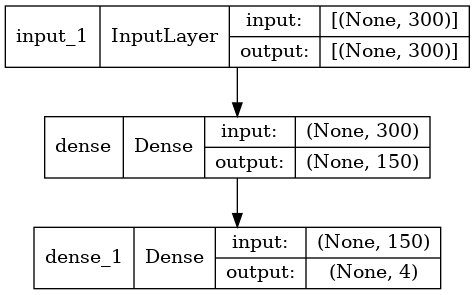

In [10]:
tf.keras.utils.plot_model(model_functional, "my_first_model_with_shape_info.png", show_shapes=True)


In [11]:
model_functional.fit(train_X, train_y, epochs=15, batch_size=100)


Epoch 1/15
40/40 [==============================] - 1s 2ms/step - loss: 5.0093 - accuracy: 0.2471
Epoch 2/15
40/40 [==============================] - 0s 2ms/step - loss: 4.8343 - accuracy: 0.2555
Epoch 3/15
40/40 [==============================] - 0s 2ms/step - loss: 4.7973 - accuracy: 0.2668
Epoch 4/15
40/40 [==============================] - 0s 2ms/step - loss: 4.9111 - accuracy: 0.2650
Epoch 5/15
40/40 [==============================] - 0s 2ms/step - loss: 5.0630 - accuracy: 0.2461
Epoch 6/15
40/40 [==============================] - 0s 2ms/step - loss: 5.0730 - accuracy: 0.2461
Epoch 7/15
40/40 [==============================] - 0s 2ms/step - loss: 5.0585 - accuracy: 0.2461
Epoch 8/15
40/40 [==============================] - 0s 2ms/step - loss: 4.9982 - accuracy: 0.2548
Epoch 9/15
40/40 [==============================] - 0s 2ms/step - loss: 4.8853 - accuracy: 0.2538
Epoch 10/15
40/40 [==============================] - 0s 2ms/step - loss: 4.8181 - accuracy: 0.2652
Epoch 11/15
40/40 [

In [12]:
model_functional.evaluate(test_X, test_y)

41/41 [==============================] - 0s 1ms/step - loss: 4.9234 - accuracy: 0.2622


[4.923435211181641, 0.2622324228286743]

No learning! Random chance would label 25% of values accurately. Averaging during the embedding stage is likely causing it to lose information